# Airbnb Project
Airbnb is a global online platform that helps travellers to find accomodation and good experiences across the globe. Not only this, Airbnb also encourages hosts to post their listings for rental business and guests to book their stay.


## Use Case 1:
We love to travel. And what would be better than finding an accomodation that suits our needs and our budget. 
We feel like it is a good idea to analyze the Airbnb dataset to understand what features drive the price of various listings.



## Use Case 2:
While on our vacation away from home, it might be a good idea to list our home on Airbnb to make some extra income. 
Also, buying a property that can be listed on Airbnb seems like a good investment. Again, analysis of features that drive the price of various listings is important for this.


# Airbnb Data:
Data Source: http://insideairbnb.com/get-the-data.html

# Airbnb datasets:

### - Listings.csv 
### - Calender.csv 
The above datasets provide detailed Listings data along with availibilty details for each listing. Some of the features that these datasets contain are: <br/>

bedrooms: number of bedrooms in a listing <br/>
bathrooms: number of bathrooms in a listing <br/>
beds: number of beds in a listing <br/>
property_type: the type of property (House, Apartment,..., Others) <br/>
room_type: the type of room (Entire Apartment or house, Shared room) <br/>
amenities: amenities for the listing (Internet, TV, etc.) <br/>
price: price per night <br/>
availability_30: number of days available in the next 30 days <br/>
accomodates: number of people the property can accomodate. <br/>

In this data exploration exercise we will precise the analysis on the Airbnb listings to Seatlle, Washington, United States.

### Authors: Yee Zhian, Sowndhariya, Lalitha, Rajshree
### Team Name: Tensors


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

listings = pd.read_csv('/content/drive/Team Drives/Tensors/listings.csv')
#check out the rows and columns
listings.shape

(3818, 92)

In [0]:
# spiltting the data into features related only to listing
listings_data = listings[['id','listing_url','name','summary','space','description','experiences_offered',
                          'notes','transit','street','neighbourhood','neighbourhood_cleansed',
                          'neighbourhood_group_cleansed','city','state','zipcode','market','smart_location',
                          'country_code','country','latitude','longitude','is_location_exact','property_type',
                          'room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities',
                          'square_feet','price','weekly_price','monthly_price','security_deposit','cleaning_fee',
                          'guests_included','extra_people','minimum_nights','maximum_nights','calendar_updated',
                          'has_availability','availability_30','availability_60','availability_90','availability_365',
                          'number_of_reviews', 'first_review','last_review','review_scores_rating',
                          'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                          'review_scores_communication','review_scores_location','review_scores_value',
                          'reviews_per_month','cancellation_policy','host_response_time','host_response_rate','host_total_listings_count']]

listings_data.to_csv('/content/drive/Team Drives/Tensors/listing_data.csv')
listings_data.head(2)

,id,listing_url,name,summary,space,description,experiences_offered,notes,transit,street,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,cancellation_policy,host_response_time,host_response_rate,host_total_listings_count
0,241032,https://www.airbnb.com/rooms/241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,"Gilman Dr W, Seattle, WA 98119, United States",...,10.0,10.0,10.0,9.0,10.0,4.07,moderate,within a few hours,96%,3.0
1,953595,https://www.airbnb.com/rooms/953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...","7th Avenue West, Seattle, WA 98119, United States",...,10.0,10.0,10.0,10.0,10.0,1.48,strict,within an hour,98%,6.0


In [0]:
# Reading the calender data
calendar = pd.read_csv('/content/drive/Team Drives/Tensors/calendar.csv')
calendar.head(2)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00


In [0]:
# spiltting the data into miscellaneous features.

others_data = listings[['id','scrape_id','last_scraped','calendar_last_scraped','thumbnail_url','medium_url',
                        'picture_url','xl_picture_url','requires_license','license','jurisdiction_names', 
                        'instant_bookable','cancellation_policy','require_guest_profile_picture',
                        'require_guest_phone_verification','calculated_host_listings_count']]

# writing the features to a csv file.
others_data.to_csv('/content/drive/Team Drives/Tensors/others_data.csv')
others_data.head(2)

,id,scrape_id,last_scraped,calendar_last_scraped,thumbnail_url,medium_url,picture_url,xl_picture_url,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,241032,20160104002432,2016-01-04,2016-01-04,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,2
1,953595,20160104002432,2016-01-04,2016-01-04,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,f,NaN,WASHINGTON,f,strict,t,t,6


## Data Cleaning and Preparation - Yee Zhian, Sowndhariya, Lalitha, Rajshree

In [0]:
calendar.rename(index=str, columns={"listing_id":"id"},inplace=True)
calendar.shape

(1393570, 4)

In [0]:
#find number of rows in dataset
rows_num = calendar.shape[0]

#find first and last date of the calendar
min_date = calendar['date'].min()
max_date = calendar['date'].max()

print('calendar.csv dataset contains %d rows.' % (rows_num))
print('The first date of observation is %s and the last date is %s.' % (min_date, max_date))

calendar.csv dataset contains 1393570 rows.
The first date of observation is 2016-01-04 and the last date is 2017-01-02.


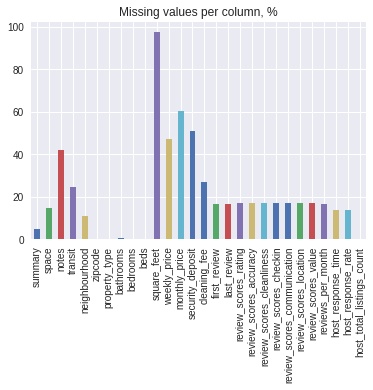

In [0]:
#find percentage of missing values for each column
listings_missing_df = listings_data.isnull().mean()*100

#filter out only columns, which have missing values
listings_columns_with_nan = listings_missing_df[listings_missing_df > 0]

#plot the results
listings_columns_with_nan.plot.bar(title='Missing values per column, %')

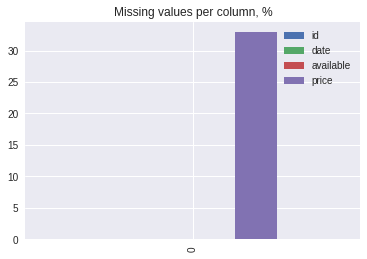

In [0]:
#get percentage of missing values for each column in dataset
calendar_missing_df = pd.DataFrame([calendar.isnull().mean()*100])

#plot the results
calendar_missing_df.plot.bar(title='Missing values per column, %')

In [0]:
#merge datasets in terms of id
df = pd.merge(calendar,listings_data,on = 'id')
df.head(3)

,id,date,available,price_x,listing_url,name,summary,space,description,experiences_offered,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,cancellation_policy,host_response_time,host_response_rate,host_total_listings_count
0,241032,2016-01-04,t,$85.00,https://www.airbnb.com/rooms/241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,...,10.0,10.0,10.0,9.0,10.0,4.07,moderate,within a few hours,96%,3.0
1,241032,2016-01-05,t,$85.00,https://www.airbnb.com/rooms/241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,...,10.0,10.0,10.0,9.0,10.0,4.07,moderate,within a few hours,96%,3.0
2,241032,2016-01-06,f,NaN,https://www.airbnb.com/rooms/241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,...,10.0,10.0,10.0,9.0,10.0,4.07,moderate,within a few hours,96%,3.0


In [0]:
df= df.sample(frac=1)

In [0]:
df = df.drop(df.index[1:1370000])

In [0]:
def get_val_from_list(row, column_name, value):
    ''' Fill in dummy column for values '''
    val = 0.0
    try:
        vals = row[column_name].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
        if value in vals:
            val = 1.0
    except:
        val = 0.0
    return val

def split_list_into_columns(df, column_name, max_dummies_num = 10):
    ''' Split values in columns, which contain lists (for example, amenities) '''
    
    # get dictionary of unique values in lists across dataset rows
    values_dict = {}

    for unique_value in df[column_name].unique(): 
        for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
            if value in values_dict:
                values_dict[value] = values_dict[value] + 1
            else:
                values_dict[value] = 0
                
    values_sorted = sorted(values_dict.items(), key=lambda kv: kv[1], reverse = True)
      
    # split into columns
    for value in values_sorted[: max_dummies_num]:
        df[column_name + '_' + value[0]] = df.apply(lambda row: get_val_from_list(row, column_name, value[0]),axis=1)
        
    return

In [0]:
#df= df.sample(frac=1)
#df = df.drop(df.index[1:1370000])
split_list_into_columns(df, 'amenities')

In [0]:
#Columns to drop
columns_to_drop = ['weekly_price', 'monthly_price','security_deposit', 'cleaning_fee', 'calendar_updated',
                    'summary', 'space', 'description','experiences_offered', 'street', 'neighbourhood', 
                    'notes', 'transit','city', 'state', 'market','listing_url',
                   'smart_location', 'country_code', 'country','is_location_exact', 'neighbourhood_cleansed',
                   'square_feet', 'has_availability', 'availability_60', 'availability_90', 'availability_365', 
                  'first_review', 'last_review','price_y','reviews_per_month']
df = df.drop(columns = columns_to_drop,axis = 1)
df.columns

Index(['id', 'date', 'available', 'price_x', 'name',
       'neighbourhood_group_cleansed', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'cancellation_policy', 'host_response_time',
       'host_response_rate', 'host_total_listings_count',
       'amenities_Wireless Internet', 'amenities_Heating', 'amenities_Kitchen',
       'amenities_Smoke Detector', 'amenities_Essentials', 'amenities_Dryer',
       'amenities_Washer', 'amenities_Internet', 'amenities_Shampoo',
       'amenities_TV'],
      dtype='object')

In [0]:
# Functions to get month and year from date column
def get_month_from_date(row):
    ''' Get month from date represented as a string '''
    return int(row['date'].split('-')[1])

def get_year_from_date(row):
    ''' Get year from date represented as a string '''
    return int(row['date'].split('-')[0])

In [0]:
#convert date from the calendar into month and drop the date colum
df['month'] = df.apply(lambda row: get_month_from_date(row),axis=1)
df['year'] = df.apply(lambda row: get_year_from_date(row),axis=1)
df = df.drop('date', axis =1)

In [0]:
df['host_response_rate1'] =df['host_response_rate'].str.replace("[%, ]", "").astype("float")

In [0]:
#define how occupy is the space 
df['occupancy_rate_30']=((30-df['availability_30'])*1.0)/30

In [0]:
#remove rows where price_x == nan, because price will be used as response column
df = df.dropna(subset=['price_x'])

In [0]:
#convert price to number and drop the price_x column
df['price'] = df['price_x'].astype(str)
df['price'] = df['price'].str.replace("[$, ]", "").astype("float")
df = df.drop('price_x', axis =1)

In [0]:
#fill in missing values for bathrooms, bedrooms and beds with mode
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode()[0])
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])
df['beds'] = df['beds'].fillna(df['beds'].mode()[0])

In [0]:
#fill missing values for review scores columns
review_scores_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                         'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                        'review_scores_value']
for column in review_scores_columns:
        df[column].fillna(df[column].mean(), inplace = True)

In [0]:
df = df.dropna(subset=['zipcode'])
df = df.dropna(subset=['property_type'])
df = df.dropna(subset=['host_response_time'])
df = df.dropna(subset=['host_response_rate'])

In [0]:
for col in df.columns:
    print (col + ', Number of Missing Values:', len(df[col][df[col].isnull()]))

id, Number of Missing Values: 0
available, Number of Missing Values: 0
name, Number of Missing Values: 0
neighbourhood_group_cleansed, Number of Missing Values: 0
zipcode, Number of Missing Values: 0
latitude, Number of Missing Values: 0
longitude, Number of Missing Values: 0
property_type, Number of Missing Values: 0
room_type, Number of Missing Values: 0
accommodates, Number of Missing Values: 0
bathrooms, Number of Missing Values: 0
bedrooms, Number of Missing Values: 0
beds, Number of Missing Values: 0
bed_type, Number of Missing Values: 0
amenities, Number of Missing Values: 0
guests_included, Number of Missing Values: 0
extra_people, Number of Missing Values: 0
minimum_nights, Number of Missing Values: 0
maximum_nights, Number of Missing Values: 0
availability_30, Number of Missing Values: 0
number_of_reviews, Number of Missing Values: 0
review_scores_rating, Number of Missing Values: 0
review_scores_accuracy, Number of Missing Values: 0
review_scores_cleanliness, Number of Missi

## Listing Prices Overview

In [0]:
df = pd.read_csv('/content/drive/Team Drives/Tensors/listings_data_cleaned.csv')
#find minimum, maximum and average price for listing
min_price = df['price'].min()
max_price = df['price'].max()
mean_price = df['price'].mean()

print('Minimum price per listing is %d$.' % (min_price))
print('Maximum price per listing is %d$' % (max_price))
print('Average price per listing is %d$.' % (mean_price))

Minimum price per listing is 25$.
Maximum price per listing is 1650$
Average price per listing is 137$.


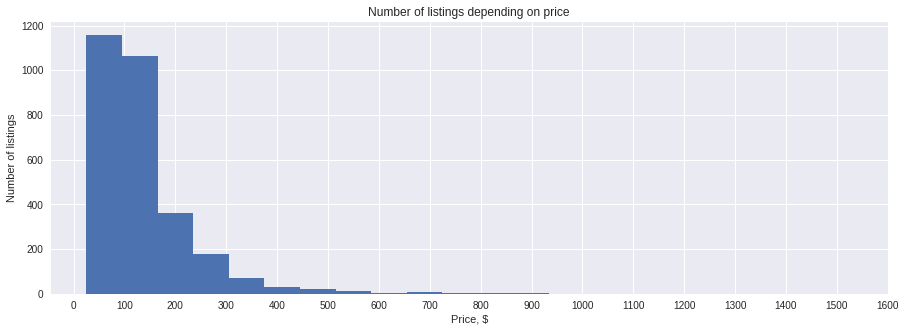

In [0]:
#get the average price for each listing
mean_price_for_listing = df.groupby('id').mean()['price']

#plot
plt.figure(figsize=(15,5))
plt.hist(mean_price_for_listing, bins=20)
plt.xticks(np.arange(0, 1700, step=100))
plt.ylabel('Number of listings')
plt.xlabel('Price, $')
plt.title('Number of listings depending on price')


plt.savefig('Price distrubution.png')

plt.show()

Now we see the distribution of average listing prices. The majority of listings is concentrated around 50 - 150 USD.

# What Are the Busiest Times of the Year to Visit Seattle?

To answer this question we should look at:

how the number of listings change depending on time of the year?
how prices change depending on time of time of the year?

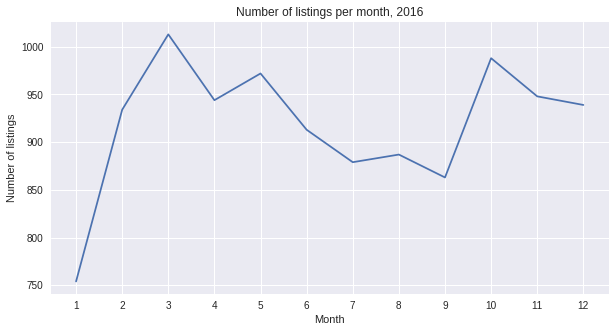

In [0]:
#find number of total number of listings for each month in 2016
number_of_listings_by_month = pd.Series([12])
for i in range(1, 13):
    number_of_listings_by_month[i] = len(df[(df['month'] == i) & (df['year'] == 2016)]['id'].unique())
    
number_of_listings_by_month = number_of_listings_by_month.drop(0)

#plot
plt.figure(figsize=(10,5))
plt.plot(number_of_listings_by_month)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Number of listings')
plt.xlabel('Month')
plt.title('Number of listings per month, 2016')

plt.savefig('number of available listings.png')

plt.show()

The diagram above shows us number of listings depending on month. We can see that number of available listings for reservation is tends to be the highest in March

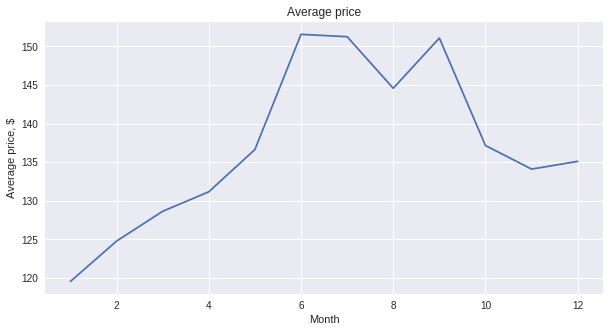

In [0]:
#find average price by month
average_price_by_month = df.groupby(['month'])['price'].mean()

#plot
plt.figure(figsize=(10,5))
plt.plot(average_price_by_month)
plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('Average price')

plt.savefig('average price for month')

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Number of Listings in Each Neighbourhood')

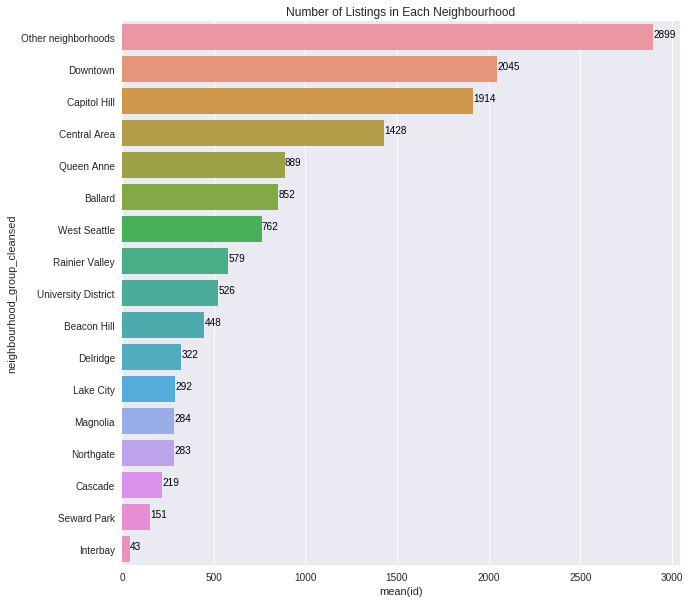

In [0]:

neighborRank = df.groupby(by='neighbourhood_group_cleansed').count()[['id']].sort_values(by='id', ascending=False)
# print(neighborRank)
plt.figure(figsize=(10,10))
g = sns.barplot(y=neighborRank.index,x=neighborRank["id"])
# The line below adds the value label in each bar
[g.text(p[1]+1,p[0],p[1], color='black') for p in zip(g.get_yticks(), neighborRank["id"])]
plt.title('Number of Listings in Each Neighbourhood')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


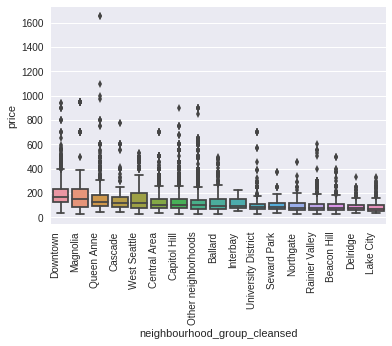

In [0]:
price_neighbourhood =df.query('price <= 500')\
                    .groupby('neighbourhood_group_cleansed')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index

# Then we filter the data to use only the prices within a certain range to avoid outliers         
data = df.query('price <= 500')

# We use seaborn boxplot to generate the graph, passing as parameters the target variable and 
# the feature we want to associate, and an additonal parameter "order" to plot them in a descending
# way.
sns.boxplot(y=df['price'], x=df['neighbourhood_group_cleansed'], order=price_neighbourhood)

# Last, we get the plot axes and modify them to rotate the labels orientation
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

The box plot of the price and the neighbourhood is really interesting since it allows to clearly see the prices distribution according to the neighbourhood. From this graph, we can determine which are the most affordable neighbourhoods and the most exclusive ones. Also since the neighbourhoods split the prices distributions in a consistent way, this could mean that this feature will be of importance to the model.

In the same way. We can analyze the spread of the prices distribution according to other features, like the room type. This help us to determine the features that split the data in the best way to achieve a decent predictive model. In the following snippet, we generate a boxplot of the prices in relation to the __room_type__ categories.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


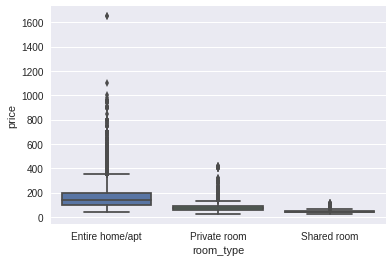

In [0]:
room_price = df.query('price <= 500')\
                    .groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
                
data = df.query('price <= 500')

sns.boxplot(y=df['price'], x=df['room_type'], order=room_price)
plt.show()

Another interesting observation comes from the room_type / price box plot. We can see that is considerably more expensive to rent an entire home or apartment compared to renting a private room or shared room. However, the difference in prices between private and shared rooms is not that much, so one could consider a private room most of the time.

In [0]:
df.to_csv('/content/drive/Team Drives/Tensors/listings_data_cleaned.csv')

In [0]:
df = pd.read_csv('/content/drive/Team Drives/Tensors/listings_data_cleaned.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


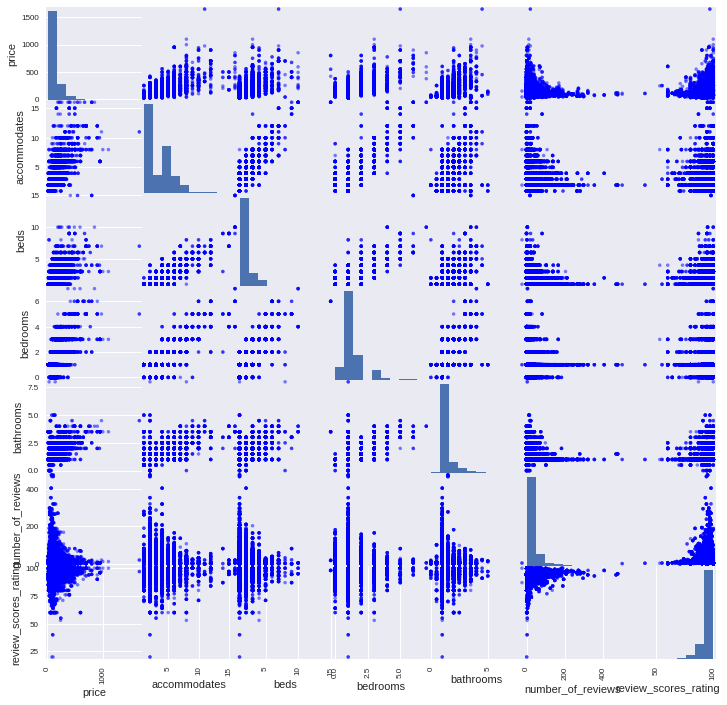

In [0]:
scattercols = ['price','accommodates', 'beds', 'bedrooms', 'bathrooms','number_of_reviews','review_scores_rating']
axs = pd.scatter_matrix(df[scattercols],
                        figsize=(12, 12), c='blue')



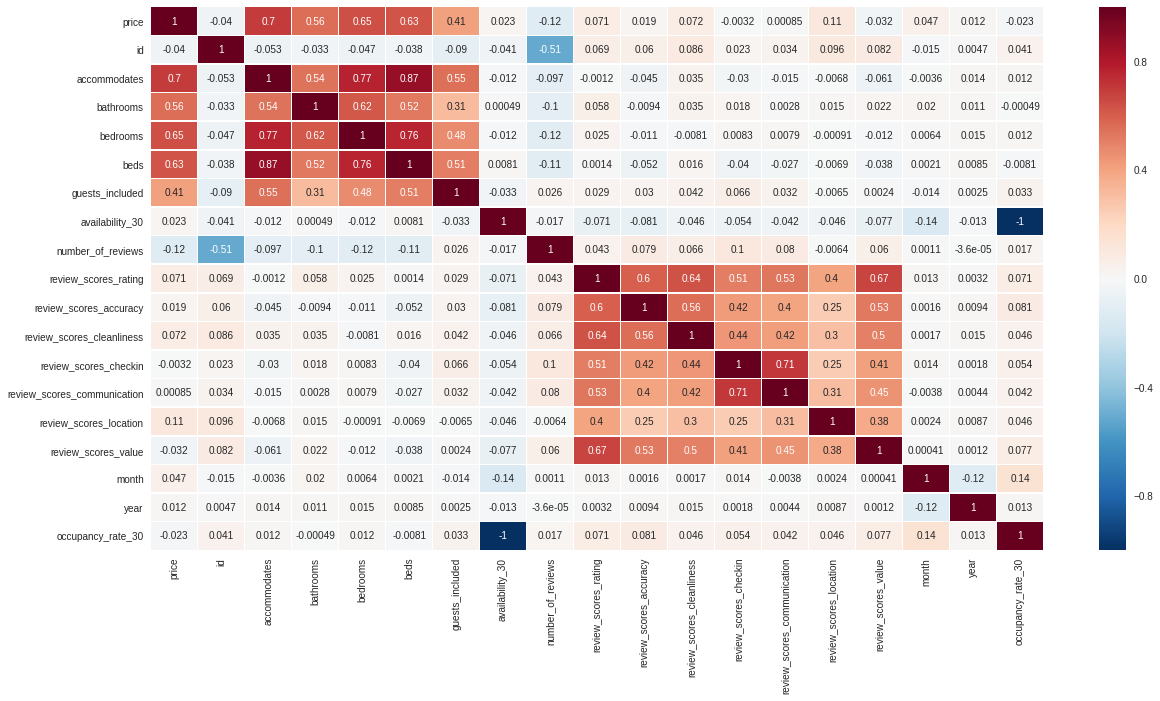

In [0]:
#Subsetting the data
Cor = df[['price','id', 'available', 'name', 'neighbourhood_group_cleansed', 'zipcode','property_type', 'room_type',
          'accommodates', 'bathrooms', 'bedrooms','beds', 'bed_type', 'guests_included', 
          'availability_30', 'number_of_reviews','review_scores_rating', 'review_scores_accuracy',
          'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location',
          'review_scores_value', 'month', 'year', 'occupancy_rate_30']] 
#Calculate the correlation of the above variables
cor = Cor.corr() 
 #Plot the correlation as heat map
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(cor,annot=True,linewidths=.5, ax=ax)

In [0]:
#6 features we are going to anlayze
A = df[['price','accommodates', 'beds', 'bedrooms', 'bathrooms','number_of_reviews','review_scores_rating']]
A.shape

(13936, 7)

In [0]:
Price_Accomd = A[['price', 'accommodates']]

In [0]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(Price_Accomd)
data_transformed = mms.transform(Price_Accomd)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Elbow method

In [0]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

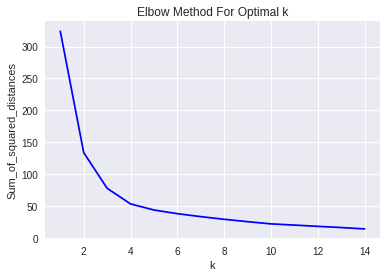

In [0]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()   

## K means for Price vs Accommodates - Lalitha, Rajshree

In [0]:
from sklearn.cluster import KMeans
clusterNum = 5
k_means = KMeans(init = "k-means++",n_clusters = clusterNum)
k_means.fit(Price_Accomd)
Price_Accomd['labels']=k_means.labels_
k_means.cluster_centers_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


array([[ 75.29580485,   2.35638654],
       [457.50551876,   7.78145695],
       [149.56635343,   3.89502636],
       [813.28571429,  10.38095238],
       [266.62539683,   5.46222222]])

Text(27.078437500000007, 0.5, 'Price')

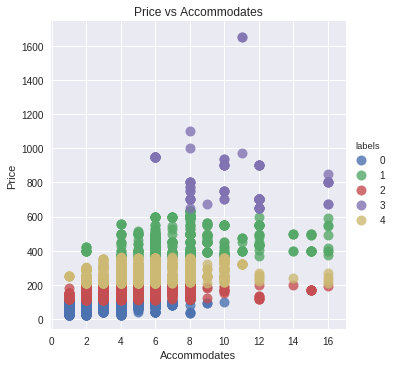

In [0]:
#Scatter plot of Price and Zipcode
sns.lmplot('accommodates', 'price', 
           data=Price_Accomd, 
           fit_reg=False, 
           hue="labels",  
           scatter_kws={"marker": "D", 
                        "s": 100})
# plt.scatter(167.42395085,   3.94991885, s=200, c='y', marker=',')
# plt.scatter(418.82210977,   7.02763721, s=200, c='y', marker=',')
# plt.scatter(60.95550003,   2.03912363, s=200, c='y', marker=',')
# plt.scatter(748.51943755,   9.28784119 , s=200, c='y', marker=',')
# plt.scatter(106.43048224,   2.96117026, s=200, c='y', marker=',')
# plt.scatter(259.98530906,   5.29327186, s=200, c='y', marker=',')

plt.title('Price vs Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Price')

## GMM for Price vs Accommodates - Yee Zhian, Sowndhariya

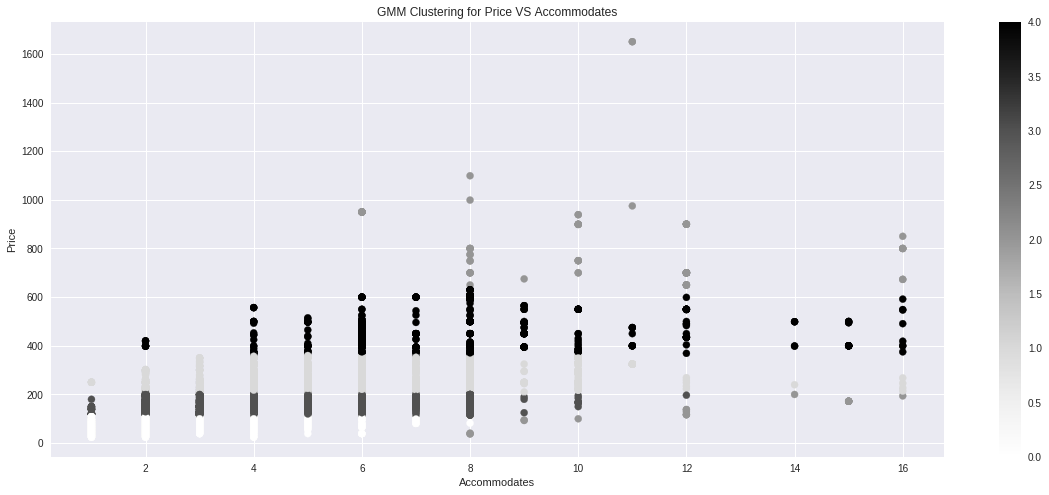

In [0]:
from sklearn.mixture import GaussianMixture
def doGMM(X, nclust=5):
    model = GaussianMixture(n_components=nclust)
    model.fit(X)
    clust_labels3 = model.predict(X)
    return (clust_labels3)

clust_labels3 = doGMM(Price_Accomd,5)
gmm = pd.DataFrame(clust_labels3)
Price_Accomd.insert((Price_Accomd.shape[1]),'gmm',gmm)


fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)
scatter = ax.scatter(Price_Accomd['accommodates'],Price_Accomd['price'],
                     c=gmm[0],s=50)
ax.set_title('GMM Clustering for Price VS Accommodates')
ax.set_xlabel('Accommodates')
ax.set_ylabel('Price')
plt.colorbar(scatter)

## K means for Price vs Bathrooms - Lalitha, Rajshree

In [0]:
Price_Bathroom = A[['price', 'bathrooms']]

In [0]:
from sklearn.cluster import KMeans
clusterNum = 5
k_means = KMeans(init = "k-means++",n_clusters = clusterNum)
k_means.fit(Price_Bathroom)
Price_Bathroom['labels']=k_means.labels_
k_means.cluster_centers_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


array([[ 75.29580485,   1.10548184],
       [266.62539683,   1.77460317],
       [457.50551876,   2.45364238],
       [149.56635343,   1.19252808],
       [813.28571429,   3.26785714]])

Text(27.078437500000007, 0.5, 'Price')

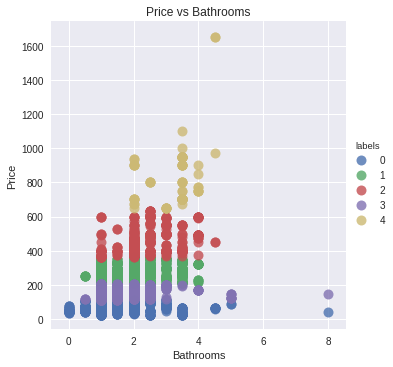

In [0]:
sns.lmplot('bathrooms', 'price', 
           data=Price_Bathroom, 
           fit_reg=False, 
           hue="labels",  
           scatter_kws={"marker": "D", 
                        "s": 100})

# plt.scatter(259.98530906,   1.70094553  , s=200, c='y', marker='>')
# plt.scatter(106.43048224,   1.08974904  , s=200, c='y', marker='>')
# plt.scatter(748.51943755,   2.9917287, s=200, c='y', marker='>')
# plt.scatter(418.82210977,   2.26732192, s=200, c='y', marker='>')
# plt.scatter(60.95550003,   1.13072341 , s=200, c='y', marker='>')
# plt.scatter(167.42395085,   1.2410735 , s=200, c='y', marker='<')

plt.title('Price vs Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price')

## GMM for Price vs Bathrooms - Yee Zhian, Sowndhariya

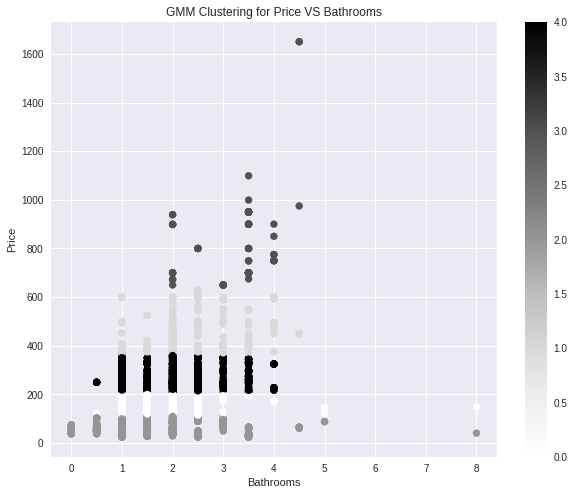

In [0]:
def doGMM(X, nclust=5):
    model = GaussianMixture(n_components=nclust)
    model.fit(X)
    clust_labels5 = model.predict(X)
    return (clust_labels5)

clust_labels5 = doGMM(Price_Bathroom)
gmm = pd.DataFrame(clust_labels5)
Price_Bathroom.insert((Price_Bathroom.shape[1]),'gmm',gmm)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
scatter = ax.scatter(Price_Bathroom['bathrooms'],Price_Bathroom['price'],
                     c=gmm[0],s=50)
ax.set_title('GMM Clustering for Price VS Bathrooms')
ax.set_xlabel('Bathrooms')
ax.set_ylabel('Price')
plt.colorbar(scatter)

In [0]:
Price_Bedrooms= A[['price', 'bedrooms']]

## K means for Price VS Bedroom - Yee Zhian, Sowndhariya

In [0]:
from sklearn.cluster import KMeans
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum)
k_means.fit(Price_Bedrooms)
Price_Bedrooms['labels']=k_means.labels_
k_means.cluster_centers_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


array([[266.62539683,   2.17904762],
       [ 75.29580485,   0.95148103],
       [149.56635343,   1.33921614],
       [813.28571429,   4.36904762],
       [457.50551876,   3.07726269]])

Text(27.078437500000007, 0.5, 'Price')

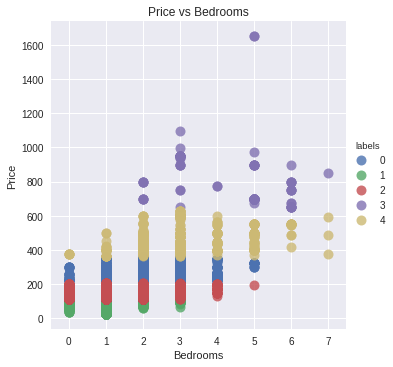

In [0]:
sns.lmplot('bedrooms','price', 
           data=Price_Bedrooms, 
           fit_reg=False, 
           hue="labels",  
           scatter_kws={"marker": "D", 
                        "s": 100})

# plt.scatter(62.93657961,   0.93229601, s=200, c='y', marker='s')
# plt.scatter(418.82210977,   2.84001557, s=200, c='y', marker='s')
# plt.scatter(168.11029354,   1.44349571, s=200, c='y', marker='s')
# plt.scatter(748.51943755,   3.91645988, s=200, c='y', marker='s')
# plt.scatter(108.65877551,   1.03085234, s=200, c='y', marker='s')
# plt.scatter(260.1584438 ,   2.12048004, s=200, c='y', marker='s')

plt.title('Price vs Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

## GMM for Price vs Bedrooms - Lalitha, Rajshree

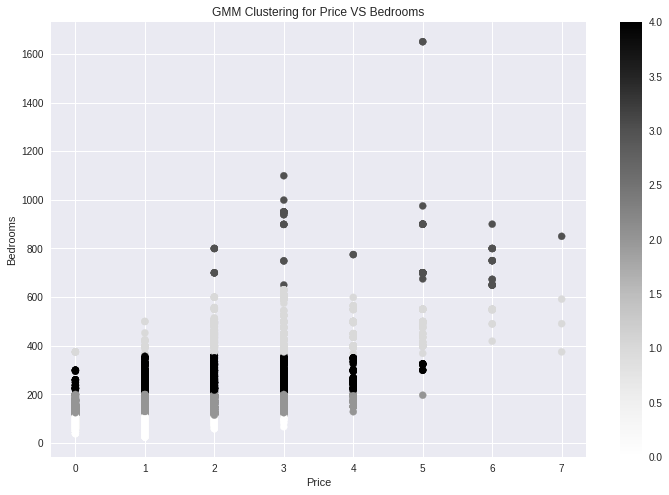

In [0]:
def doGMM(X, nclust=5):
    model = GaussianMixture(n_components=nclust)
    model.fit(X)
    clust_labels4 = model.predict(X)
    return (clust_labels4)

clust_labels4 = doGMM(Price_Bedrooms,5)
gmm = pd.DataFrame(clust_labels4)
Price_Bedrooms.insert((Price_Bedrooms.shape[1]),'gmm',gmm)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
scatter = ax.scatter(Price_Bedrooms['bedrooms'],Price_Bedrooms['price'],
                     c=gmm[0],s=50)
ax.set_title('GMM Clustering for Price VS Bedrooms')
ax.set_xlabel('Price')
ax.set_ylabel('Bedrooms')
plt.colorbar(scatter)

In [0]:
Price_Bed= A[['price', 'beds']]

## K-means for Price vs Beds - Yee Zhian, Sowndhariya

In [0]:
from sklearn.cluster import KMeans
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum)
k_means.fit(Price_Bed)
Price_Bed['labels']=k_means.labels_
k_means.cluster_centers_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


array([[ 75.29580485,   1.26899879],
       [266.62539683,   2.84571429],
       [149.56635343,   1.93307357],
       [813.28571429,   6.11904762],
       [457.50551876,   4.11699779]])

Text(27.078437500000007, 0.5, 'Price')

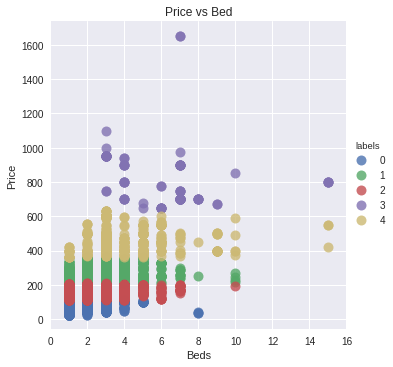

In [0]:
sns.lmplot('beds','price', 
           data=Price_Bed, 
           fit_reg=False, 
           hue="labels",  
           scatter_kws={"marker": "D", 
                        "s": 100})

# plt.scatter(108.65877551,   1.50953181, s=200, c='y', marker='s')
# plt.scatter(748.51943755,   5.19851117, s=200, c='y', marker='s')
# plt.scatter(259.98530906,   2.77760413, s=200, c='y', marker='s')
# plt.scatter(418.82210977,   3.60587777, s=200, c='y', marker='s')
# plt.scatter(168.0234566 ,   1.98880391, s=200, c='y', marker='s')
# plt.scatter(62.93657961,   1.17233954, s=200, c='y', marker='s')

plt.title('Price vs Bed')
plt.xlabel('Beds')
plt.ylabel('Price')

## GMM for Price vs Beds - Lalitha, Rajshree

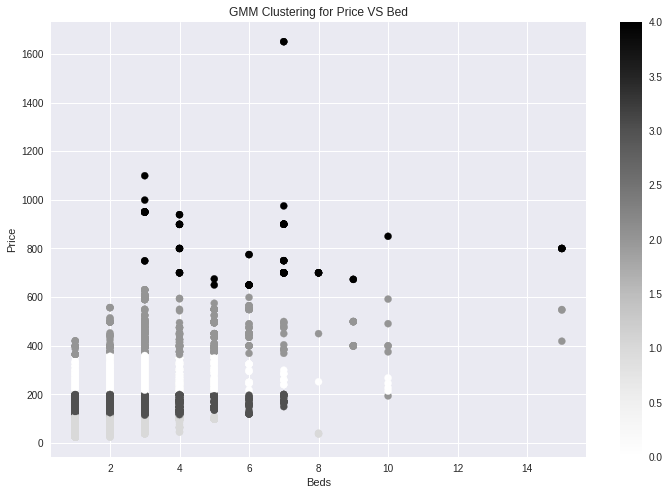

In [0]:
def doGMM(X, nclust=5):
    model = GaussianMixture(n_components=nclust)
    model.fit(X)
    clust_labels6 = model.predict(X)
    return (clust_labels6)

clust_labels6 = doGMM(Price_Bed,5)
gmm = pd.DataFrame(clust_labels6)
Price_Bed.insert((Price_Bed.shape[1]),'gmm',gmm)


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
scatter = ax.scatter(Price_Bed['beds'], Price_Bed['price'],
                     c=gmm[0],s=50)
ax.set_title('GMM Clustering for Price VS Bed')
ax.set_xlabel('Beds')
ax.set_ylabel('Price')
plt.colorbar(scatter)

In [0]:
Price_number_of_reviews= A[['price', 'number_of_reviews']]

## K-means for Price vs Number of reviews - Yee Zhian, Sowndhariya

In [0]:
from sklearn.cluster import KMeans
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum)
k_means.fit(Price_number_of_reviews)
Price_number_of_reviews['labels']=k_means.labels_
k_means.cluster_centers_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


array([[ 78.5154185 ,  19.88973435],
       [308.72579505,  14.97314488],
       [623.79844961,  11.36434109],
       [ 97.22035928, 157.13053892],
       [163.2501905 ,  17.58674117]])

Text(27.078437500000007, 0.5, 'Price')

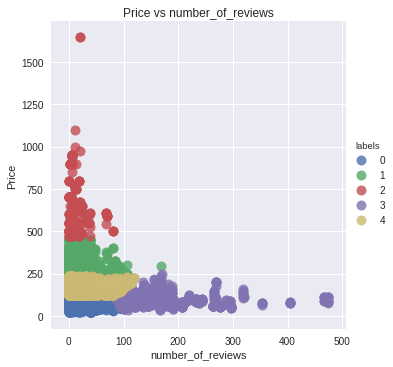

In [0]:
 sns.lmplot('number_of_reviews','price', 
           data=Price_number_of_reviews, 
           fit_reg=False, 
           hue="labels",  
           scatter_kws={"marker": "D", 
                        "s": 100})

plt.title('Price vs number_of_reviews')
plt.xlabel('number_of_reviews')
plt.ylabel('Price')

## GMM for Price vs Number of Reviews - Lalitha, Rajshree

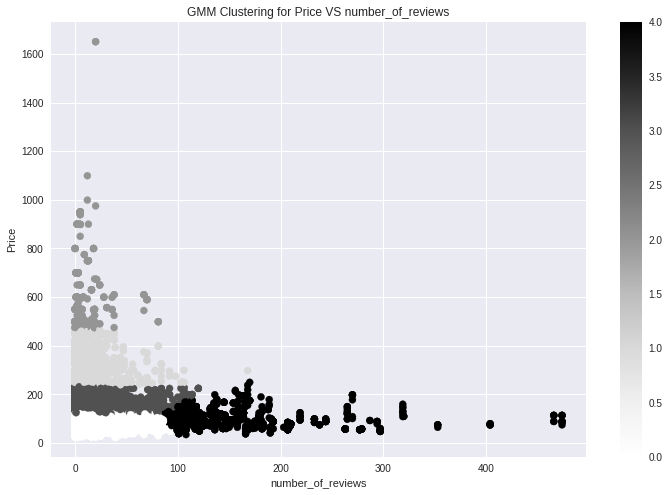

In [0]:
def doGMM(X, nclust=5):
    model = GaussianMixture(n_components=nclust)
    model.fit(X)
    clust_labels7 = model.predict(X)
    return (clust_labels7)

clust_labels7 = doGMM(Price_number_of_reviews,5)
gmm = pd.DataFrame(clust_labels7)
Price_number_of_reviews.insert((Price_number_of_reviews.shape[1]),'gmm',gmm)


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
scatter = ax.scatter(Price_number_of_reviews['number_of_reviews'], Price_number_of_reviews['price'],
                     c=gmm[0],s=50)
ax.set_title('GMM Clustering for Price VS number_of_reviews')
ax.set_xlabel('number_of_reviews')
ax.set_ylabel('Price')
plt.colorbar(scatter)

In [0]:
Price_review_scores_rating= A[['price', 'review_scores_rating']]

## K-means for Price vs Review Scores Rating - Yee Zhian, Sowndhariya

In [0]:
from sklearn.cluster import KMeans
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum)
k_means.fit(Price_review_scores_rating)
Price_review_scores_rating['labels']=k_means.labels_
k_means.cluster_centers_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


array([[149.56635343,  94.68623694],
       [ 75.29580485,  94.06648883],
       [457.50551876,  95.19013814],
       [266.62539683,  95.01818052],
       [813.28571429,  97.37958694]])

Text(27.078437500000007, 0.5, 'Price')

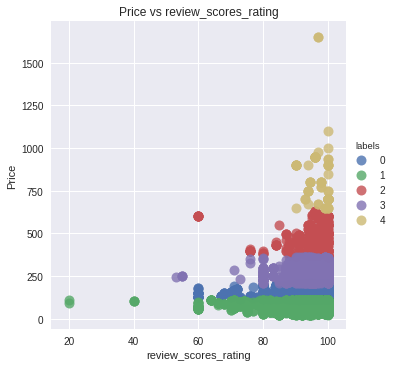

In [0]:
 sns.lmplot('review_scores_rating','price', 
           data=Price_review_scores_rating, 
           fit_reg=False, 
           hue="labels",  
           scatter_kws={"marker": "D", 
                        "s": 100})

plt.title('Price vs review_scores_rating')
plt.xlabel('review_scores_rating')
plt.ylabel('Price')

## GMM for Price vs Review Scores Rating - Lalitha, Rajshree

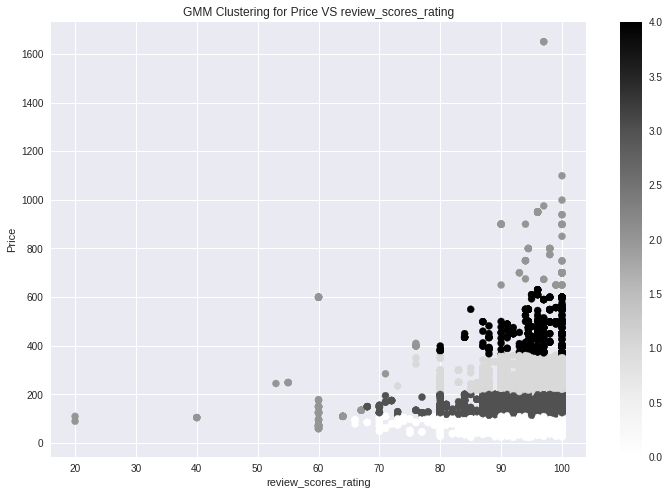

In [0]:
def doGMM(X, nclust=5):
    model = GaussianMixture(n_components=nclust)
    model.fit(X)
    clust_labels7 = model.predict(X)
    return (clust_labels7)

clust_labels7 = doGMM(Price_review_scores_rating,5)
gmm = pd.DataFrame(clust_labels7)
Price_review_scores_rating.insert((Price_review_scores_rating.shape[1]),'gmm',gmm)


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
scatter = ax.scatter(Price_review_scores_rating['review_scores_rating'], Price_review_scores_rating['price'],
                     c=gmm[0],s=50)
ax.set_title('GMM Clustering for Price VS review_scores_rating')
ax.set_xlabel('review_scores_rating')
ax.set_ylabel('Price')
plt.colorbar(scatter)

# Analysis:

We see the distribution for pricing is strongly skewed right. This again makes sense as a majority of the listings on Airbnb are single individual listings. Additionally, Airbnb does strongly cater to travelers who are looking for cheaper places to stay for short durations of time. There are of course listings with a high pricing as well; intuitively this matches with hosts that are listing a high value property such as an entire house.
Looking at the heat map, we can see that 'accomodates', 'bedrooms', 'bathrooms', 'beds' have the highest correlation to the price.

To know how these features affect the price of the listings, we have implemented K means and GMM clustering algorithms on these features vs the price of the listing <br/>
The number of clusters is determined using the elbow method. <br/>

Both the algorithms formed very much similar clusters but K-means seems doing a better clustering job according to "Price vs Bed" plots. From the GMM plot, the darker green dots has been scattered and mixed with the purple cluster. Also, we see that these features have a positive corelation with the price. As the number of bedrooms, accomodates, bathrooms and beds increase, the price also increases. <br/>

#### Next Step: 
- After we have implemented K-means and GMM, we can try others clustering method to compare the result. 
- We would like to spilt the data into smaller samples and implement K means and GMM to see if we notice any change in the cluster formation.
- We would like to implement agglomerative clustering to get more insights from the dataset




In [0]:

listing1 = pd.read_csv('/content/drive/Team Drives/Tensors/listings_data_cleaned.csv')
#check out the rows and columns
listing1.shape

(13936, 48)

In [0]:
listing2 = listing1

In [0]:
listing2 = listing1[listing1.review_scores_rating.notnull()]

In [0]:
listing2['occupancy_rate_30']=((30-listing1['availability_30'])*1.0)/30

In [0]:
from sklearn.cluster import KMeans

In [0]:
keep_c=['bedrooms','price','occupancy_rate_30','review_scores_rating']

In [0]:
df_c = listing2[keep_c]

In [0]:
clus = KMeans(n_clusters=10,n_jobs=-1,random_state=0)

In [0]:
# Fit the data

clus.fit(df_c)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [0]:
# Create the column 'labels' to store the results of clustering

df_c['labels']=clus.labels_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
# Check clusters to find those clusters with highest occupancy rate and highest rating scores

df_c.groupby('labels').mean()


,bedrooms,price,occupancy_rate_30,review_scores_rating
labels,,,,
0,0.955443,55.429426,0.310237,93.847898
1,1.196374,134.066370,0.335740,94.628922
2,3.065217,442.683230,0.234265,95.169360
3,2.117417,244.886497,0.307991,94.938298
4,4.108333,621.258333,0.341667,96.027016
5,0.948263,91.432111,0.325221,94.244037
6,3.794872,898.641026,0.152137,96.125264
7,5.000000,1650.000000,0.966667,97.000000
8,2.369686,325.199630,0.286876,95.388793


In [0]:
# Include more variables to plot

keep3=['property_type','room_type','bedrooms','bathrooms','beds','neighbourhood_group_cleansed']

In [0]:
# Define the new data frame with more variables

X3 = listing2[keep3]

In [0]:
# Include labels from clustering

X3['cluster']=clus.labels_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
#@title
X3['most_competitive']=((X3.cluster==1) | (X3.cluster==4) | (X3.cluster==7))*1.0

X3.head(100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,property_type,room_type,bedrooms,bathrooms,beds,neighbourhood_group_cleansed,cluster,most_competitive
0,House,Private room,1.0,1.0,2.0,Other neighborhoods,0,0.0
1,House,Entire home/apt,1.0,1.0,2.0,Other neighborhoods,1,1.0
2,Apartment,Entire home/apt,1.0,1.0,1.0,Cascade,5,0.0
3,Apartment,Entire home/apt,1.0,1.0,2.0,Other neighborhoods,1,1.0
4,House,Private room,1.0,1.0,2.0,Other neighborhoods,0,0.0
5,House,Private room,1.0,1.0,1.0,Delridge,5,0.0
6,House,Private room,1.0,1.0,2.0,Other neighborhoods,5,0.0
7,Apartment,Entire home/apt,1.0,1.0,1.0,Ballard,1,1.0
8,House,Private room,1.0,1.5,1.0,Delridge,0,0.0
9,House,Entire home/apt,2.0,1.0,2.0,Central Area,1,1.0


Popular Area's : Central Area,Downtown,Capitol Hill, Queen Ane